In [58]:
import pandas as pd

density_train = pd.read_csv("data/density_train.csv", sep=";", decimal=",")
density_test = pd.read_csv("data/density_test.csv", sep=";", decimal=",")

display(density_train.head(3))
display(density_test.head(3))

T  Al2O3  TiO2  Density
0  20    0.0   0.0  1.06250
1  25    0.0   0.0  1.05979
2  35    0.0   0.0  1.05404

T  Al2O3  TiO2  Density
0  30   0.00   0.0  1.05696
1  55   0.00   0.0  1.04158
2  25   0.05   0.0  1.08438

c:\Users\user\Projects\python\fuzzy\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


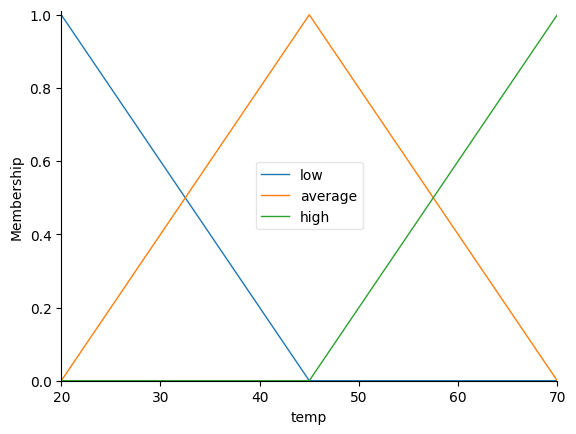

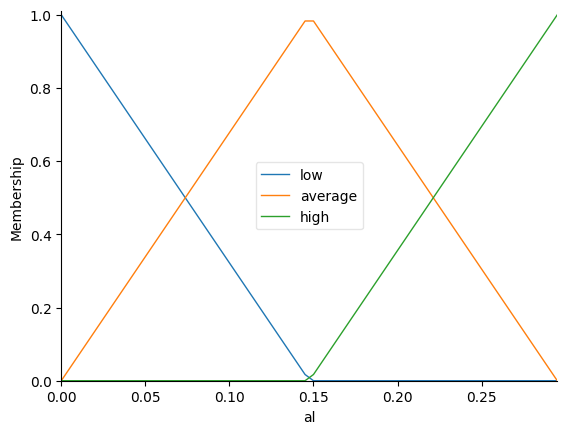

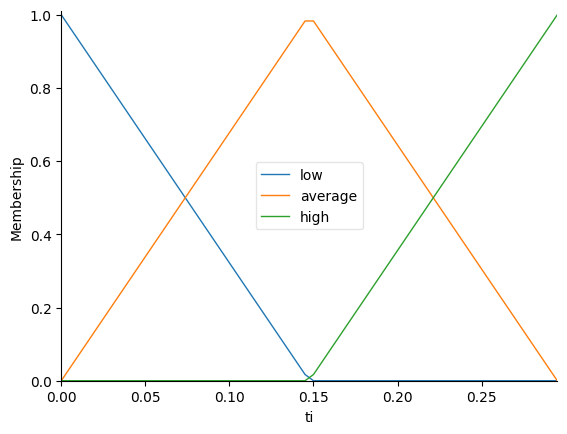

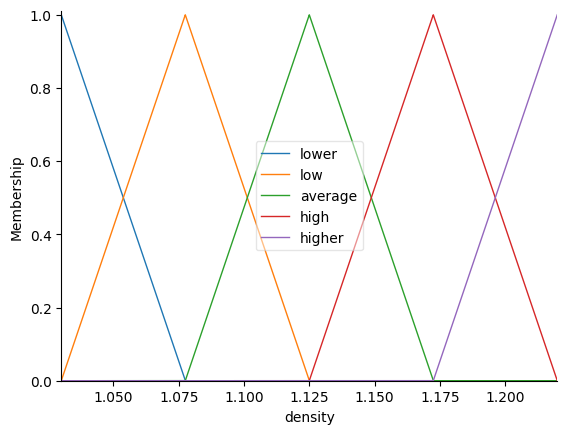

In [59]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz

temp = ctrl.Antecedent(density_train["T"].sort_values().unique(), "temp")
al = ctrl.Antecedent(np.arange(0, 0.3, 0.005), "al")
ti = ctrl.Antecedent(np.arange(0, 0.3, 0.005), "ti")
density = ctrl.Consequent(np.arange(1.03, 1.22, 0.00001), "density")

temp.automf(3, variable_type="quant")
temp.view()
al.automf(3, variable_type="quant")
al.view()
ti.automf(3, variable_type="quant")
ti.view()
density.automf(5, variable_type="quant")
density.view()

In [60]:
rule11 = ctrl.Rule(
    temp["low"] & al["low"] & ti["low"],
    density["low"],
)
rule12 = ctrl.Rule(
    temp["average"] & al["low"] & ti["low"],
    density["lower"],
)
rule13 = ctrl.Rule(
    temp["high"] & al["low"] & ti["low"],
    density["lower"],
)

rule21 = ctrl.Rule(
    temp["low"] & al["average"] & ti["low"],
    density["low"],
)
rule22 = ctrl.Rule(
    temp["average"] & al["average"] & ti["low"],
    density["low"],
)
rule23 = ctrl.Rule(
    temp["high"] & al["average"] & ti["low"],
    density["lower"],
)

rule31 = ctrl.Rule(
    temp["low"] & al["high"] & ti["low"],
    density["high"],
)
rule32 = ctrl.Rule(
    temp["low"] & al["high"] & ti["low"],
    density["high"],
)
rule33 = ctrl.Rule(
    temp["high"] & al["high"] & ti["low"],
    density["average"],
)

rule41 = ctrl.Rule(
    temp["low"] & al["low"] & ti["average"],
    density["low"],
)
rule42 = ctrl.Rule(
    temp["average"] & al["low"] & ti["average"],
    density["low"],
)
rule43 = ctrl.Rule(
    temp["high"] & al["low"] & ti["average"],
    density["lower"],
)

rule51 = ctrl.Rule(
    temp["low"] & al["low"] & ti["high"],
    density["higher"],
)
rule52 = ctrl.Rule(
    temp["average"] & al["low"] & ti["high"],
    density["high"],
)
rule53 = ctrl.Rule(
    temp["high"] & al["low"] & ti["high"],
    density["high"],
)

In [61]:
fuzzy_rules = [
    rule11,
    rule12,
    rule13,
    rule21,
    rule22,
    rule23,
    rule31,
    rule32,
    rule33,
    rule41,
    rule42,
    rule43,
    rule51,
    rule52,
    rule53,
]

density_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(density_cntrl)

fuzzy_rules

[IF (temp[low] AND al[low]) AND ti[low] THEN density[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (temp[average] AND al[low]) AND ti[low] THEN density[lower]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (temp[high] AND al[low]) AND ti[low] THEN density[lower]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (temp[low] AND al[average]) AND ti[low] THEN density[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (temp[average] AND al[average]) AND ti[low] THEN density[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (temp[high] AND al[average]) AND ti[low] THEN density[lower]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (temp[low] AND al[high]) AND ti[low] THEN density[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (temp[low] AND al[high]) AND ti[low] THEN density[high]
 	AND aggregation fun

In [62]:
sim.input["temp"] = 20
sim.input["al"] = 0.3
sim.input["ti"] = 0.0
sim.compute()
sim.print_state()
display(sim.output["density"])

 Antecedents 
Antecedent: temp                    = 20
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0
Antecedent: al                      = 0.295
  - low                             : 0.0
  - average                         : 0.0
  - high                            : 1.0
Antecedent: ti                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0

 Rules 
RULE #0:
  IF (temp[low] AND al[low]) AND ti[low] THEN density[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - temp[low]                                              : 1.0
  - al[low]                                                : 0.0
  - ti[low]                                                : 1.0
                       (temp[low] AND al[low]) AND ti[low] = 0.0
  Activation (THEN-clause):
                      

np.float64(1.1724924997377486)

In [63]:
def fuzzy_pred(row):
    sim.input["temp"] = row["T"]
    sim.input["al"] = row["Al2O3"]
    sim.input["ti"] = row["TiO2"]
    sim.compute()
    return sim.output["density"]

In [65]:
result_train = density_train.copy()

result_train["DensityPred"] = result_train.apply(fuzzy_pred, axis=1)

result_train.head(15)

T  Al2O3  TiO2  Density  DensityPred
0   20   0.00   0.0  1.06250     1.077498
1   25   0.00   0.0  1.05979     1.076593
2   35   0.00   0.0  1.05404     1.069156
3   40   0.00   0.0  1.05103     1.061106
4   45   0.00   0.0  1.04794     1.045833
5   50   0.00   0.0  1.04477     1.046360
6   60   0.00   0.0  1.03826     1.047642
7   65   0.00   0.0  1.03484     1.046360
8   70   0.00   0.0  1.03182     1.045833
9   20   0.05   0.0  1.08755     1.077498
10  45   0.05   0.0  1.07105     1.067145
11  50   0.05   0.0  1.06760     1.067145
12  55   0.05   0.0  1.06409     1.067988
13  65   0.05   0.0  1.05691     1.062538
14  70   0.05   0.0  1.05291     1.047191

In [66]:
result_test = density_test.copy()

result_test["DensityPred"] = result_test.apply(fuzzy_pred, axis=1)

result_test

T  Al2O3  TiO2  Density  DensityPred
0   30   0.00  0.00  1.05696     1.073918
1   55   0.00  0.00  1.04158     1.047642
2   25   0.05  0.00  1.08438     1.076518
3   30   0.05  0.00  1.08112     1.073918
4   35   0.05  0.00  1.07781     1.069156
5   40   0.05  0.00  1.07446     1.067145
6   60   0.05  0.00  1.06053     1.067988
7   35   0.30  0.00  1.17459     1.172492
8   65   0.30  0.00  1.14812     1.124995
9   45   0.00  0.05  1.07424     1.067145
10  50   0.00  0.05  1.07075     1.067145
11  55   0.00  0.05  1.06721     1.067988
12  20   0.00  0.30  1.22417     1.204157
13  30   0.00  0.30  1.21310     1.180834
14  40   0.00  0.30  1.20265     1.173397
15  60   0.00  0.30  1.18265     1.172492
16  70   0.00  0.30  1.17261     1.172492

In [67]:
import math
from sklearn import metrics


rmetrics = {}
rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_train["Density"], result_train["DensityPred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Density"], result_test["DensityPred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Density"], result_test["DensityPred"])
)
rmetrics["R2_test"] = metrics.r2_score(
    result_test["Density"], result_test["DensityPred"]
)

rmetrics

{'RMSE_train': 0.0156766544822719,
 'RMSE_test': 0.014603864614526584,
 'RMAE_test': 0.1057231829134674,
 'R2_test': 0.9436578668511394}